In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Read the CSV file
datatxt_original = pd.read_csv('primes_data40000-45000.txt')
datatxt=datatxt_original[1:]
# Count occurrences of each number in the 'Number' column
number_counts_primes_plus_one = datatxt['Primes +1'].value_counts().sort_index()
number_counts_primes_minus_one = datatxt['Primes -1'].value_counts().sort_index()
number_counts_primes_twins = datatxt['Twins'].value_counts().sort_index()





i=0;
ratio_primes_max_X=[]
ratio_primes_max_Y=[]
for primes in ranging:
    
    """fig2 = go.Figure()

# Add the original data counts
    fig2.add_trace(go.Scatter(
        x=primes[0],
        y=primes[1],
        mode='lines+markers',
        name='Original Counts',
        marker=dict(color='red',size=8, opacity=0.5),
        
    ))

    # Add the Log-normal fit line

    #name=f'flipped primes to {range_prime[ranging.index(primes)]}'
    
    # Update layout
    fig2.update_layout(
        title=f"range to {range_prime[i]}" ,
        xaxis_title='Counts',
        yaxis_title='Twin',
        legend=dict(x=1, y=0.9),
        template='plotly_white'
    )
    
    # Show the figure
    fig2.show()"""
    ratio_primes_max_X.append((range_prime[i]))
    ratio_primes_max_Y.append((1/(range_prime[i]/max(primes[1]))))
    i+=1

"""data2 = pd.read_csv('primes_data40000-40500 copy.txt')

# Count occurrences of each number in the specified columns for the second dataset
number_counts_primes_plus_one_data2 = data2['Primes +1'].value_counts().sort_index()
number_counts_primes_minus_one_data2 = data2['Primes -1'].value_counts().sort_index()
number_counts_primes_twins_data2 = data2['Twins'].value_counts().sort_index()

# Add the counts from the second dataset to the counts from the first dataset
number_counts_primes_plus_one = number_counts_primes_plus_one.add(number_counts_primes_plus_one_data2, fill_value=0)
number_counts_primes_minus_one = number_counts_primes_minus_one.add(number_counts_primes_minus_one_data2, fill_value=0)
number_counts_primes_twins = number_counts_primes_twins.add(number_counts_primes_twins_data2, fill_value=0)"""



# Plot the results using Plotly
fig = go.Figure(data=[go.Scatter(x=number_counts_primes_plus_one.index, y=number_counts_primes_plus_one.values,mode="lines",
     line=dict(color="red"))])

# Customize the plot
fig.update_layout(
    title='Occurrences of Each Number of primes +1 generated',
    xaxis_title='Number',
    yaxis_title='Count'
)

# Show the plot
fig.show()

fig_primes_minus_one = go.Figure(data=[go.Scatter(x=number_counts_primes_minus_one.index, y=number_counts_primes_minus_one.values,mode="lines",
     line=dict(color="red"))])

# Customize the plot
fig_primes_minus_one.update_layout(
    title='Occurrences of Each  Number primes -1 generated',
    xaxis_title='Number',
    yaxis_title='Count'
)

# Show the plot
fig_primes_minus_one.show()


fig_twins = go.Figure(data=[go.Scatter(
    x=number_counts_primes_twins.index,
     y=number_counts_primes_twins.values,
     mode="lines",
     line=dict(color="red")
     )])

# Customize the plot
fig_twins.update_layout(
    title='Example',
    xaxis_title='Number',
    yaxis_title='Count'
)

# Show the plot
fig_twins.show()

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skewnorm

# Parameters
# Define key points for the skewed distribution
# Define key points for the skewed distribution
number=450000
ln_number = np.log(number)
x1 = ln_number**2  # Approximate position of the peak
y1 = number / (2 * ln_number**2)  # Peak height
x2 = ln_number**3+500  # Start of the extended tail decay
x3 = 2 * ln_number**3  # End of extended tail
print(f"x1: {x1}, y1: {y1}")

# Skewness parameter (a) - Controls the steepness of the left rise
a = 5  # Increase this to control the left-side steepness
loc = x1  # Position the peak at x1
scale = 400  # Reduce scale for a narrower peak

# Generate values from the skew-normal distribution
x_values = np.linspace(0, x3, 3000)
skew_data = skewnorm.pdf(x_values, a, loc, scale) * y1 * 200  # Normalize to match peak height

# Right-side logarithmic decay function (for x > x2)
# Combine the skew-normal distribution with the smooth logarithmic decay
y_values = np.clip(skew_data, 0, y1)

import plotly.graph_objs as go
import plotly.offline as pyo

# Sample data (replace with your actual x_values and y_values)
# x_values = [...]  
# y_values = [...]

# Create the figure
fig = go.Figure()

# Add a scatter plot (line) to the figure
fig.add_trace(go.Scatter(
    x=x_values,
    y=y_values,
    mode='lines',
    line=dict(color='red'),
    name='Smooth Curve'
))

# Update layout with title and axis labels
fig.update_layout(
    title='Positively Skewed Distribution with Smooth Decay',
    xaxis_title='Value',
    yaxis_title='Frequency',
    template='plotly',  # Optional: use a different template
)

# Show the plot
pyo.iplot(fig)
import numpy as np
import pandas as pd
from scipy.stats import skewnorm
from scipy.optimize import minimize
import plotly.graph_objects as go
import matplotlib.pyplot as plt

# Prepare the data
#datatxt=datatxt_original[1000:5000]
# Count occurrences of each number in the 'Number' column
number_counts_primes_plus_one = datatxt['Primes +1'].value_counts().sort_index()
number_counts_primes_minus_one = datatxt['Primes -1'].value_counts().sort_index()
number_counts_primes_twins = datatxt['Twins'].value_counts().sort_index()
number_counts_primes_twins = datatxt['Twins'].value_counts().sort_index()
X = number_counts_primes_twins.index
Y = number_counts_primes_twins.values

# Visualize the data distribution
plt.hist(Y, bins=20, alpha=0.6, color='blue')
plt.title('Histogram of Counts')
plt.xlabel('Counts')
plt.ylabel('Frequency')
plt.show()

# Define the skew-normal log-likelihood function
def skew_normal_log_likelihood(params, y):
    loc, scale, alpha = params
    
    # Ensure scale is positive
    if scale <= 0:
        return np.inf
    
    # Calculate the log-likelihood using optimized parameters
    log_likelihood = skewnorm.logpdf(y, alpha, loc=loc, scale=scale)
    
    # Handle potential invalid values in log_likelihood
    log_likelihood = np.where(np.isfinite(log_likelihood), log_likelihood, 0)
    
    return -np.sum(log_likelihood)

# Initial parameter guesses: loc, scale, alpha
initial_params = [30.43, 43.83, 2]  # Example initial values

# Optimize the parameters
result = minimize(skew_normal_log_likelihood, initial_params, args=(Y,))
optimized_params = result.x

# Generate values for plotting the skew-normal distribution
x_values = np.linspace(min(X), max(X), 300)
y_values = skewnorm.pdf(x_values, optimized_params[2], loc=optimized_params[0], scale=max(Y))

# Scale the y-values for plotting (adjust scaling to match histogram)
scaled_y_values = y_values * (max(Y) / max(y_values))

# Create Plotly figure
fig = go.Figure()

# Add scatter plot of the original data
fig.add_trace(go.Scatter(
    x=X,
    y=Y,
    mode='markers',
    name='Data Points',
    marker=dict(size=8, opacity=0.5)
))

# Add the skew-normal fit line
fig.add_trace(go.Scatter(
    x=x_values,
    y=scaled_y_values,
    mode='lines',
    name='Skew-Normal Fit',
    line=dict(color='red')
))

# Update layout
fig.update_layout(
    title='Skew-Normal Regression of Twins Count',
    xaxis_title='Twins',
    yaxis_title='Counts',
    legend=dict(x=6, y=0.9),
    template='plotly_white'
)

# Show the figure
fig.show()

# Output optimized parameters
print("Optimized parameters:")
print(f"Location: {optimized_params[0]}, Scale: {optimized_params[1]}, Shape (alpha): {optimized_params[2]}")


In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import skewnorm
from scipy.optimize import minimize
import plotly.graph_objects as go
import matplotlib.pyplot as plt


datatxt_original = pd.read_csv('primes_data40000-40500 copy.txt')
datatxt=datatxt_original[1:]

# Count occurrences of each number in the 'Number' column
number_counts_primes_plus_one = datatxt['Primes +1'].value_counts().sort_index()
number_counts_primes_minus_one = datatxt['Primes -1'].value_counts().sort_index()
number_counts_primes_twins = datatxt['Twins'].value_counts().sort_index()

# Prepare the data
number_counts_primes_twins = datatxt['Twins'].value_counts().sort_index()
X = number_counts_primes_twins.index
Y = number_counts_primes_twins.values

# Visualize the data distribution
plt.hist(Y, bins=20, alpha=0.6, color='blue')
plt.title('Histogram of Counts')
plt.xlabel('Counts')
plt.ylabel('Frequency')
plt.show()

# Define the skew-normal log-likelihood function
def skew_normal_log_likelihood(params, y):
    loc, scale, alpha = params
    if scale <= 0:
        return np.inf
    log_likelihood = skewnorm.logpdf(y, -0.00571615841666619, loc=loc, scale=scale)
    return -np.sum(np.where(np.isfinite(log_likelihood), log_likelihood, 0))

max_index = np.argmax(Y)  # Get the index of the maximum value
loc = X[max_index]   
# Initial parameter guesses
initial_params = [ loc, 130,-0.00571615841666619]  # Starting with mean, std dev, and a positive alpha

# Optimize the parameters with bounds
bounds = [(None, None), (1e-3, None), (None, None)]  # Scale must be positive
result = minimize(skew_normal_log_likelihood, initial_params, args=(Y,), bounds=bounds)

optimized_params = result.x

# Generate values for plotting the skew-normal distribution
x_values = np.linspace(min(X), max(X), 400)


y_values = skewnorm.pdf(x_values,  s=2.5, loc=loc, scale=max(X)/20)


# Scale the y-values for plotting
scaled_y_values = y_values * (max(Y) / max(y_values))
from scipy.stats import kstest

# Perform K-S test
ks_statistic, p_value = kstest(Y, 'skewnorm', args=[ loc, 130,-0.00571615841666619])
print(f"K-S Statistic: {ks_statistic}, p-value: {p_value}")
# Create Plotly figure
fig = go.Figure()

# Add scatter plot of the original data
fig.add_trace(go.Scatter(
    x=X,
    y=Y,
    mode='markers',
    name='Data Points',
    marker=dict(size=8, opacity=0.5)
))

# Add the skew-normal fit line
fig.add_trace(go.Scatter(
    x=x_values,
    y=scaled_y_values,
    mode='lines',
    name='Skew-Normal Fit',
    line=dict(color='red')
))

# Update layout
fig.update_layout(
    title='Skew-Normal Regression of Twins Count',
    xaxis_title='Twins',
    yaxis_title='Counts',
    legend=dict(x=6, y=0.9),
    template='plotly_white'
)

# Show the figure
fig.show()

# Output optimized parameters
print("Optimized parameters:")
print(f"Location: {optimized_params[0]}, Scale: {optimized_params[1]}, Shape (alpha): {optimized_params[2]}")
from scipy.stats import skew

# Calculate skewness
skewness_value = skew(Y)
print(f"Skewness: {skewness_value}")
from scipy.stats import kurtosis

# Calculate kurtosis
kurtosis_value = kurtosis(Y)
print(f"Kurtosis: {kurtosis_value}")

import numpy as np
import matplotlib.pyplot as plt

# Calculate histogram
counts, bin_edges = np.histogram(Y, bins=20, density=True)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# Fit a line to log-transformed counts
log_counts = np.log(counts + 1e-10)  # Add a small value to avoid log(0)
coefficients = np.polyfit(bin_centers, log_counts, 1)
slope = coefficients[0]
print(f"Slope of the log-transformed histogram: {slope}")
import scipy.stats as stats

# Generate Q-Q plot
from scipy.stats import kstest

# Perform K-S test
ks_statistic, p_value = kstest(Y, 'skewnorm', args=optimized_params)
print(f"K-S Statistic: {ks_statistic}, p-value: {p_value}")

from scipy.stats import anderson

# Perform Anderson-Darling test
result = anderson(Y, dist='skewnorm')
print(f"Anderson-Darling Statistic: {result.statistic}, Critical Values: {result.critical_values}, Significance Levels: {result.significance_level}")


In [ ]:
from scipy.stats import gamma

# Define the gamma log-likelihood function
def gamma_log_likelihood(params, y):
    shape, scale = params
    if shape <= 0 or scale <= 0:
        return np.inf
    log_likelihood = gamma.logpdf(y, a=shape, scale=scale)
    return -np.sum(np.where(np.isfinite(log_likelihood), log_likelihood, 0))

# Initial parameter guesses for the Gamma distribution
initial_params_gamma = [2.0, 10.0]  # Shape and scale

# Optimize the parameters for Gamma
result_gamma = minimize(gamma_log_likelihood, initial_params_gamma, args=(Y,))
optimized_params_gamma = result_gamma.x

# Generate values for plotting the Gamma distribution
y_values_gamma = gamma.pdf(x_values, a=optimized_params_gamma[0], scale=max(X)/20)

# Scale the y-values for plotting
scaled_y_values_gamma = y_values_gamma * (max(Y) / max(y_values_gamma))

# Add the Gamma fit line to the plot
fig.add_trace(go.Scatter(
    x=x_values,
    y=scaled_y_values_gamma,
    mode='lines',
    name='Gamma Fit',
    line=dict(color='green')
))


In [ ]:
from scipy.stats import lognorm

datatxt_original = pd.read_csv('primes_data40000-40500 copy.txt')
datatxt=datatxt_original[1:40000]
number_counts_primes_twins = datatxt['Twins'].value_counts().sort_index()
X = number_counts_primes_twins.index
Y = number_counts_primes_twins.values
# Define the log-normal log-likelihood function
def lognormal_log_likelihood(params, y):
    shape, loc, scale = params
    if scale <= 0:
        return np.inf
    log_likelihood = lognorm.logpdf(y, s=shape, loc=loc, scale=scale)
    return -np.sum(np.where(np.isfinite(log_likelihood), log_likelihood, 0))

# Initial parameter guesses for the Log-normal distribution
initial_params_lognorm = [0, 10, 1]  # Shape, location, and scale

# Optimize the parameters for Log-normal
result_lognorm = minimize(lognormal_log_likelihood, initial_params_lognorm, args=(Y,))
optimized_params_lognorm = result_lognorm.x
print(optimized_params_lognorm)
max_index = np.argmax(Y)  # Get the index of the maximum value
loc = X[max_index]   
# Generate values for plotting the Log-normal distribution
y_values_lognorm = lognorm.pdf(x_values, s=2, loc=loc, scale=np.median(Y)/2)
print(loc)
# Scale the y-values for plotting
scaled_y_values_lognorm = y_values_lognorm * (max(Y) / max(y_values_lognorm))

data = Y.lognormal(mean=1, sigma=0.5, size=np.median(Y))

# Automatically estimate the parameters (s, loc, scale) using lognorm.fit
shape, loc, scale = lognorm.fit(data)

print(f"Shape (s): {shape}")
print(f"Location (loc): {loc}")
print(f"Scale: {scale}")

# Add the Log-normal fit line to the plot
fig2 = go.Figure()
fig2.add_trace(go.Scatter(
    x=x_values,
    y=scaled_y_values_lognorm,
    mode='lines',
    name='Log-Normal Fit',
    line=dict(color='blue')
))
fig2.add_trace(go.Scatter(
    x=X,
    y=Y,
    mode='lines',
    name='Ocuuernce of twin primes count',
    line=dict(color='red')
))
import scipy.stats as stats
import matplotlib.pyplot as plt
fig2.show()
# Generate Q-Q plot
"""stats.probplot(Y, dist="lognorm", s=1, loc=14.8, scale=max(X)/14.8, plot=plt)
plt.title('Q-Q Plot')
"""
from scipy.stats import ks_2samp

# Generate log-normal distributed data for testing
simulated_data = lognorm.rvs( s=1, loc=0, scale=10)

# Perform the KS test
ks_statistic, p_value = ks_2samp(Y, simulated_data)
print(f'KS Statistic: {ks_statistic}, p-value: {p_value}')

In [30]:
import numpy as np
import pandas as pd
from scipy.stats import lognorm
from scipy.optimize import minimize
import plotly.graph_objects as go
import math

# Assuming datatxt and Y are defined as in your previous context 10,50,100,300,500,1000,2000,4000,6000,10000,15000,20000,25000,35000,
datatxt_original = pd.read_csv('primes_data40000-45000.txt')
#range_prime=[40000,45000]
range_prime= np.linspace(10, 45000, 44800)

#range_prime=[2,6,30,210,2310,30030,45000]
ranging=[]
for range_max in range_prime:
    datatxt=datatxt_original[:int(range_max)]
    number_counts_primes_twins = datatxt['Twins'].value_counts().sort_index()
    X = number_counts_primes_twins.index
    Y = number_counts_primes_twins.values
    #print(X,Y)
    ranging.append([X,Y])
    
datatxt=datatxt_original[1:45000]
# Count occurrences of each number in the 'Number' column
number_counts_primes_plus_one = datatxt['Primes +1'].value_counts().sort_index()
number_counts_primes_minus_one = datatxt['Primes -1'].value_counts().sort_index()
number_counts_primes_twins = datatxt['Twins'].value_counts().sort_index()

X = number_counts_primes_twins.index
Y = number_counts_primes_twins.values

# Define the log-normal log-likelihood function
def lognormal_log_likelihood(params, y):
    shape, loc, scale = params
    if scale <= 0 or shape <= 0:
        return np.inf
    log_likelihood = lognorm.logpdf(y, s=shape, loc=loc, scale=scale)
    return -np.sum(np.where(np.isfinite(log_likelihood), log_likelihood, 0))

# Get the index of the maximum value for initial loc
max_index = np.argmax(Y)
print(np.argmax(X))
print(np.argmax(Y))
loc = X[max_index]

# Initial parameter guesses for the Log-normal distribution
initial_params_lognorm = [np.pi/2, loc, max(Y)]  # Shape, location, and scale

# Optimize the parameters for Log-normal
result_lognorm = minimize(lognormal_log_likelihood, initial_params_lognorm, args=(Y,))
optimized_params_lognorm = result_lognorm.x
print(np.mean(Y))
# Generate values for plotting the Log-normal distribution
x_values = np.linspace(min(X), max(X), max(X))
mean=np.floor(np.median(Y))
#print(Y)  # Adjust range for x_values
y_values_lognorm = lognorm.pdf(x_values, s=1.7, loc=loc, scale=max(Y))
print(loc)
# Scale the y-values for plotting
scaled_y_values_lognorm = y_values_lognorm * (max(Y) / max(y_values_lognorm))

# Create a Plotly figure
fig2 = go.Figure()

# Add the original data counts
fig2.add_trace(go.Scatter(
    x=X,
    y=Y,
    mode='lines+markers',
    name='Original Counts',
    marker=dict(color='red',size=8, opacity=0.5),
    
))

# Add the Log-normal fit line
"""fig2.add_trace(go.Scatter(
    x=x_values,
    y=scaled_y_values_lognorm,
    mode='lines',
    name='Log-Normal Fit',
    line=dict(color='blue')
))"""

# Update layout
fig2.update_layout(
    title='Log-Normal Distribution Fit to Twins Count',
    xaxis_title='Counts',
    yaxis_title='Twin',
    legend=dict(x=1, y=0.9),
    template='plotly_white'
)

# Show the figure
fig2.show()
i=0;
ratio_primes_max_X=[]
ratio_primes_max_Y=[]
for primes in ranging:
    
    """fig2 = go.Figure()

# Add the original data counts
    fig2.add_trace(go.Scatter(
        x=primes[0],
        y=primes[1],
        mode='lines+markers',
        name='Original Counts',
        marker=dict(color='red',size=8, opacity=0.5),
        
    ))

    # Add the Log-normal fit line

    #name=f'flipped primes to {range_prime[ranging.index(primes)]}'
    
    # Update layout
    fig2.update_layout(
        title=f"range to {range_prime[i]}" ,
        xaxis_title='Counts',
        yaxis_title='Twin',
        legend=dict(x=1, y=0.9),
        template='plotly_white'
    )
    
    # Show the figure
    fig2.show()"""
    ratio_primes_max_X.append((primes[0]))
    ratio_primes_max_Y.append((1/(primes[0]/max(primes[1]))))
    i+=1
fig2 = go.Figure()

# Add the original data counts
fig2.add_trace(go.Scatter(
        x=ratio_primes_max_X,
        y=ratio_primes_max_Y,
        mode='lines+markers',
        name='Original Counts',
        marker=dict(color='red',size=8, opacity=0.5),
        
    ))
fig2.update_layout(
    title='Ratio max(Y)/n without adjust to range 45000 and without Y squared ',
    xaxis_title='n',
    yaxis_title='ratio',
    legend=dict(x=1, y=0.9),
    template='plotly_white'
)
fig2.show()
# Output optimized parameters
print("Optimized Log-normal parameters:")
print(f"Shape: {optimized_params_lognorm[0]}, Location: {optimized_params_lognorm[1]}, Scale: {optimized_params_lognorm[2]}")


KeyboardInterrupt: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the logarithmic model function
def log_model(x, a, b):
    return a / np.log(x) + b

# Example data (replace with your real data)
n = np.array(ratio_primes_max_X)  # Use n > 1 because log(1) = 0
y = np.array(ratio_primes_max_Y)

# Perform curve fitting
popt, pcov = curve_fit(log_model, n, y)
a_opt, b_opt = popt
print(f"Optimal parameters: a = {a_opt}, b = {b_opt}")

# Generate points for the fitted curve
n_fit = np.linspace(min(n), max(n), 100)
y_fit = log_model(n_fit, *popt)

# Plot the original data and the fitted curve
plt.scatter(n, y, color='red', label='Data')
plt.plot(n_fit, y_fit, label=f'Fit: a / log(n) + b', color='blue')

plt.xlabel('n')
plt.ylabel('max(Y)/n')
plt.title('Curve Fitting: max(Y)/n vs n')
plt.legend()
plt.show()

# Evaluate the fit (R-squared)
y_pred = log_model(n, *popt)
ss_res = np.sum((y - y_pred) ** 2)
ss_tot = np.sum((y - np.mean(y)) ** 2)
r_squared = 1 - (ss_res / ss_tot)
print(f"R-squared: {r_squared}")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skewnorm

# Parameters
number = 45000
ln_number = np.log(number)

# Define key points for the skewed distribution
x1 = ln_number**2  # Approximate position of the peak
y1 = number / (2 * ln_number**2)  # Peak height
x2 = ln_number**3  # Start of the extended tail decay
x3 = 2 * ln_number**3  # End of extended tail

# Skewness parameter (a) - Controls the steepness of the left rise
a = 6  # Adjust this to control the left-side steepness
loc = x1  # Position the peak at x1
scale = 500  # Controls the spread of the curve

# Generate values from the skew-normal distribution
x_values = np.linspace(0, 2500, 3000)
skew_data = skewnorm.pdf(x_values, a, loc, scale) * y1 * 500  # Normalize to match peak height

# Right-side logarithmic decay function (for x > x2)
def logarithmic_decay(x):
    if x > x2:
        return y1 / (np.log(x - x2 + 2) + 1)  # Smooth decay starting from x2
    else:
        return 0

# Apply the logarithmic decay for the right side after the peak
decay_values = np.array([logarithmic_decay(x) for x in x_values])

# Combine the skew-normal distribution with the smooth logarithmic decay
y_values = np.clip(skew_data + decay_values, 0, y1)

# Plot the smooth curve without noise or additional peaks
plt.plot(x_values, y_values, color='red')
plt.title('Positively Skewed Distribution with Smooth Decay')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skewnorm

# Parameters
number = 45000
ln_number = np.log(number)

# Define key points for the skewed distribution
x1 = ln_number**2  # Peak position
y1 = number / (2 * ln_number**2)  # Peak height
x2 = ln_number**3  # Tail start
x3 = 2 * ln_number**3  # Tail end

# Generate a skew-normal distribution
a = 6  # Skewness parameter for a sharp rise
loc = x1  # Location of the peak
scale = 400  # Scale for spread

# Generate values from the skew-normal distribution
x_values = np.linspace(0, 2500, 3000)
skew_data = skewnorm.pdf(x_values, a, loc, scale) * y1 * 500  # Normalize to match peak height

# Extend the right tail by adding a smooth log decay for x > x2

# Apply the extended tail function
extended_tail_values = np.array([extended_tail(x) for x in x_values])

# Combine the skewed distribution with the extended tail
y_values = np.clip(skew_data , 0, y1)

# Plot the smooth curve
plt.plot(x_values, y_values, color='red')
plt.title('Smooth Positively Skewed Distribution with Extended Tail (No Secondary Peak)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Optimal parameters: a = 0.24932625507164335, b = -0.024707500931791214


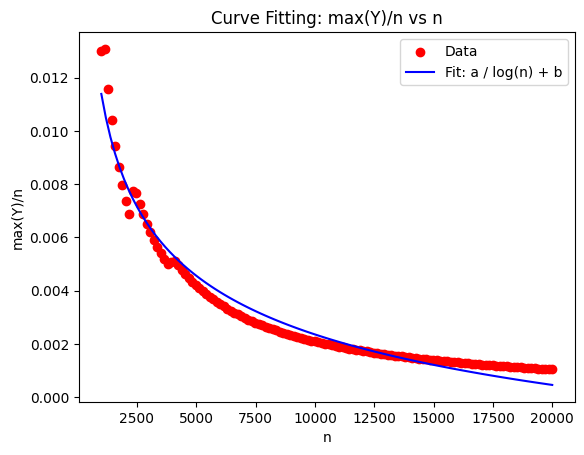

R-squared: 0.9669688223804256


In [31]:
import numpy as np
import pandas as pd
from scipy.stats import lognorm
from scipy.optimize import minimize
import plotly.graph_objects as go
import math

# Read the CSV file
datatxt_original = pd.read_csv('primes_data40000-45000.txt')
datatxt=datatxt_original[1:]
# Count occurrences of each number in the 'Number' column
number_counts_primes_plus_one = datatxt['Primes +1'].value_counts().sort_index()
number_counts_primes_minus_one = datatxt['Primes -1'].value_counts().sort_index()
number_counts_primes_twins = datatxt['Twins'].value_counts().sort_index()


#range_prime=[2,6,30,210,2310,30030,45000]
range_prime= np.linspace(1000, 20000, 130)

ranging=[]
for range_max in range_prime:
    datatxt=datatxt_original[:int(range_max)]
    number_counts_primes_plus_one = datatxt['Primes +1'].value_counts().sort_index()
    X = number_counts_primes_plus_one.index
    Y = number_counts_primes_plus_one.values
    #print(X,Y)
    ranging.append([X,Y])




i=0;
ratio_primes_max_X=[]
ratio_primes_max_Y=[]
for primes in ranging:
    
    """fig2 = go.Figure()

# Add the original data counts
    fig2.add_trace(go.Scatter(
        x=primes[0],
        y=primes[1],
        mode='lines+markers',
        name='Original Counts',
        marker=dict(color='red',size=8, opacity=0.5),
        
    ))

    # Add the Log-normal fit line

    #name=f'flipped primes to {range_prime[ranging.index(primes)]}'
    
    # Update layout
    fig2.update_layout(
        title=f"range to {range_prime[i]}" ,
        xaxis_title='Counts',
        yaxis_title='Twin',
        legend=dict(x=1, y=0.9),
        template='plotly_white'
    )
    
    # Show the figure
    fig2.show()"""
    ratio_primes_max_X.append((range_prime[i]))
    ratio_primes_max_Y.append((1/(range_prime[i]/max(primes[1]))))
    i+=1
fig2 = go.Figure()

# Add the original data counts
fig2.add_trace(go.Scatter(
        x=ratio_primes_max_X,
        y=ratio_primes_max_Y,
        mode='lines+markers',
        name='Original Counts',
        marker=dict(color='red',size=8, opacity=0.5),
        
    ))
fig2.update_layout(
    title='Ratio max(Y)/n without adjust to range 45000 and without Y squared ',
    xaxis_title='n',
    yaxis_title='ratio',
    legend=dict(x=1, y=0.9),
    template='plotly_white'
)
fig2.show()
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the logarithmic model function
def log_model(x, a, b):
    return a / np.log(x) + b

# Example data (replace with your real data)
n = np.array(ratio_primes_max_X)  # Use n > 1 because log(1) = 0
y = np.array(ratio_primes_max_Y)

# Perform curve fitting
popt, pcov = curve_fit(log_model, n, y)
a_opt, b_opt = popt
print(f"Optimal parameters: a = {a_opt}, b = {b_opt}")

# Generate points for the fitted curve
n_fit = np.linspace(min(n), max(n), 100)
y_fit = log_model(n_fit, *popt)

# Plot the original data and the fitted curve
plt.scatter(n, y, color='red', label='Data')
plt.plot(n_fit, y_fit, label=f'Fit: a / log(n) + b', color='blue')

plt.xlabel('n')
plt.ylabel('max(Y)/n')
plt.title('Curve Fitting: max(Y)/n vs n')
plt.legend()
plt.show()

# Evaluate the fit (R-squared)
y_pred = log_model(n, *popt)
ss_res = np.sum((y - y_pred) ** 2)
ss_tot = np.sum((y - np.mean(y)) ** 2)
r_squared = 1 - (ss_res / ss_tot)
print(f"R-squared: {r_squared}")


Optimal parameters: a = 0.07601311231962797, b = -0.006493486822638844


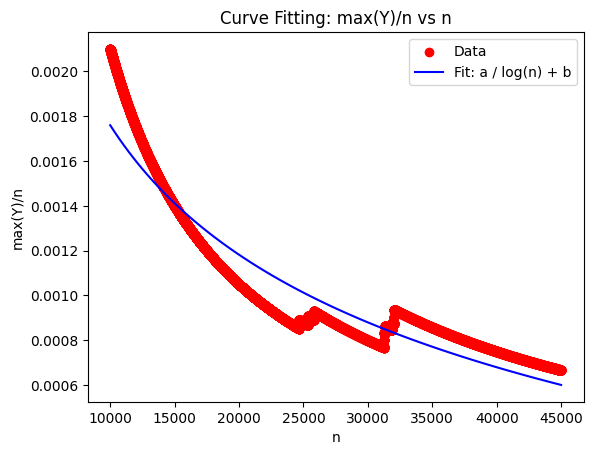

R-squared: 0.8912940611283907


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the logarithmic model function
def log_model(x, a, b):
    return a / np.log(x) + b

# Example data (replace with your real data)
n = np.array(ratio_primes_max_X)  # Use n > 1 because log(1) = 0
y = np.array(ratio_primes_max_Y)

# Perform curve fitting
popt, pcov = curve_fit(log_model, n, y)
a_opt, b_opt = popt
print(f"Optimal parameters: a = {a_opt}, b = {b_opt}")

# Generate points for the fitted curve
n_fit = np.linspace(min(n), max(n), 100)
y_fit = log_model(n_fit, *popt)

# Plot the original data and the fitted curve
plt.scatter(n, y, color='red', label='Data')
plt.plot(n_fit, y_fit, label=f'Fit: a / log(n) + b', color='blue')

plt.xlabel('n')
plt.ylabel('max(Y)/n')
plt.title('Curve Fitting: max(Y)/n vs n')
plt.legend()
plt.show()

# Evaluate the fit (R-squared)
y_pred = log_model(n, *popt)
ss_res = np.sum((y - y_pred) ** 2)
ss_tot = np.sum((y - np.mean(y)) ** 2)
r_squared = 1 - (ss_res / ss_tot)
print(f"R-squared: {r_squared}")


Optimal parameters: a = 0.07909510842851701, b = -0.006787163953042419


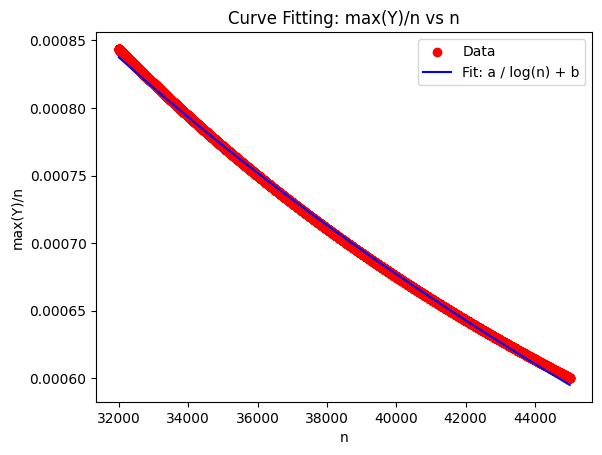

R-squared: 0.9987261982089777


In [24]:
import numpy as np
import pandas as pd
from scipy.stats import lognorm
from scipy.optimize import minimize
import plotly.graph_objects as go
import math

# Read the CSV file
datatxt_original = pd.read_csv('primes_data40000-45000.txt')
datatxt=datatxt_original[1:]
# Count occurrences of each number in the 'Number' column
number_counts_primes_plus_one = datatxt['Primes +1'].value_counts().sort_index()
number_counts_primes_minus_one = datatxt['Primes -1'].value_counts().sort_index()
number_counts_primes_twins = datatxt['Twins'].value_counts().sort_index()


#range_prime=[2,6,30,210,2310,30030,45000]
range_prime= np.linspace(32000, 45000, 13000)

ranging=[]
for range_max in range_prime:
    datatxt=datatxt_original[:int(range_max)]
    number_counts_primes_plus_one = datatxt['Primes -1'].value_counts().sort_index()
    X = number_counts_primes_plus_one.index
    Y = number_counts_primes_plus_one.values
    #print(X,Y)
    ranging.append([X,Y])




i=0;
ratio_primes_max_X=[]
ratio_primes_max_Y=[]
for primes in ranging:
    
    """fig2 = go.Figure()

# Add the original data counts
    fig2.add_trace(go.Scatter(
        x=primes[0],
        y=primes[1],
        mode='lines+markers',
        name='Original Counts',
        marker=dict(color='red',size=8, opacity=0.5),
        
    ))

    # Add the Log-normal fit line

    #name=f'flipped primes to {range_prime[ranging.index(primes)]}'
    
    # Update layout
    fig2.update_layout(
        title=f"range to {range_prime[i]}" ,
        xaxis_title='Counts',
        yaxis_title='Twin',
        legend=dict(x=1, y=0.9),
        template='plotly_white'
    )
    
    # Show the figure
    fig2.show()"""
    ratio_primes_max_X.append((range_prime[i]))
    ratio_primes_max_Y.append((1/(range_prime[i]/max(primes[1]))))
    i+=1
fig2 = go.Figure()

# Add the original data counts
fig2.add_trace(go.Scatter(
        x=ratio_primes_max_X,
        y=ratio_primes_max_Y,
        mode='lines+markers',
        name='Original Counts',
        marker=dict(color='red',size=8, opacity=0.5),
        
    ))
fig2.update_layout(
    title='Ratio max(Y)/n without adjust to range 45000 and without Y squared ',
    xaxis_title='n',
    yaxis_title='ratio',
    legend=dict(x=1, y=0.9),
    template='plotly_white'
)
fig2.show()
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the logarithmic model function
def log_model(x, a, b):
    return a / np.log(x) + b

# Example data (replace with your real data)
n = np.array(ratio_primes_max_X)  # Use n > 1 because log(1) = 0
y = np.array(ratio_primes_max_Y)

# Perform curve fitting
popt, pcov = curve_fit(log_model, n, y)
a_opt, b_opt = popt
print(f"Optimal parameters: a = {a_opt}, b = {b_opt}")

# Generate points for the fitted curve
n_fit = np.linspace(min(n), max(n), 100)
y_fit = log_model(n_fit, *popt)

# Plot the original data and the fitted curve
plt.scatter(n, y, color='red', label='Data')
plt.plot(n_fit, y_fit, label=f'Fit: a / log(n) + b', color='blue')

plt.xlabel('n')
plt.ylabel('max(Y)/n')
plt.title('Curve Fitting: max(Y)/n vs n')
plt.legend()
plt.show()

# Evaluate the fit (R-squared)
y_pred = log_model(n, *popt)
ss_res = np.sum((y - y_pred) ** 2)
ss_tot = np.sum((y - np.mean(y)) ** 2)
r_squared = 1 - (ss_res / ss_tot)
print(f"R-squared: {r_squared}")
